processed datasets
* source (European): https://drive.google.com/file/d/1kQp0OH7uOWj9uFI33-2o3UIdWyPi7xrr/view?usp=drive_link
* target (South Asian): https://drive.google.com/file/d/1saCEiiAUhyZ1gO-Xo_xFO0AC_eKcrNbH/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##source dataset

In [ ]:
sp = pd.read_csv('source_processed.csv')

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30715 entries, 0 to 30714
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30715 non-null  int64  
 1   beta           30715 non-null  float64
 2   eaf            30715 non-null  float64
 3   maf            30715 non-null  float64
 4   position       30715 non-null  int64  
 5   stdErr         30715 non-null  float64
 6   zScore         30715 non-null  float64
 7   alt_C          30715 non-null  int64  
 8   alt_G          30715 non-null  int64  
 9   alt_T          30715 non-null  int64  
 10  minorAllele_C  30715 non-null  int64  
 11  minorAllele_G  30715 non-null  int64  
 12  minorAllele_T  30715 non-null  int64  
 13  logP           30715 non-null  float64
 14  prs_component  30715 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 3.5 MB


In [ ]:
sp.head()

,Unnamed: 0,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component
0,0,0.20847,0.818773,0.181227,99326756,0.044504,4.684298,0,1,0,0,0,1,5.516256,0.170690
1,1,0.16144,0.395911,0.395911,108227879,0.035517,4.545429,0,1,0,0,1,0,5.229774,0.063916
2,2,-0.16410,0.319393,0.319393,99321471,0.037596,-4.364826,0,1,0,0,1,0,4.868413,-0.052412
3,3,0.18319,0.215747,0.215747,85738944,0.042367,4.323884,0,0,1,0,0,1,4.788612,0.039523
4,4,0.19737,0.174115,0.174115,34803165,0.045921,4.298034,0,1,0,0,1,0,4.738404,0.034365


frequency distrtibution of prs

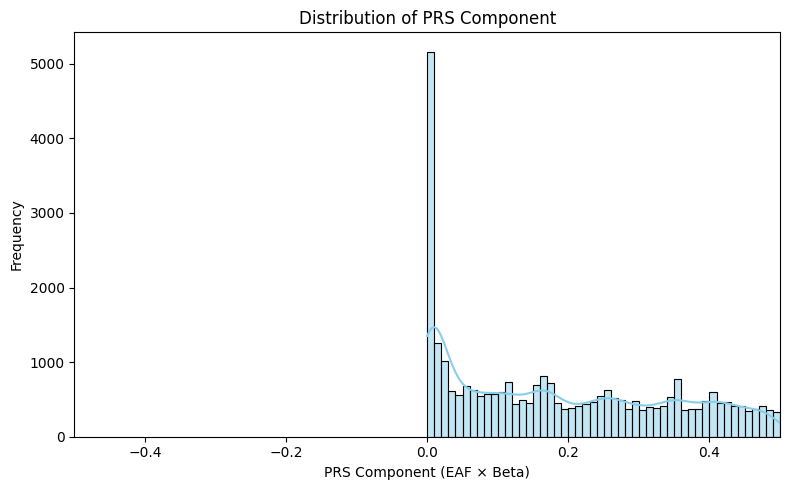

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(sp["maf"], kde=True, bins=50, color='skyblue')
plt.title("Distribution of PRS Component")
plt.xlabel("PRS Component (EAF × Beta)")
plt.ylabel("Frequency")

plt.xlim(-0.5, 0.5)
plt.tight_layout()
plt.show()

logP values vs SNP positions

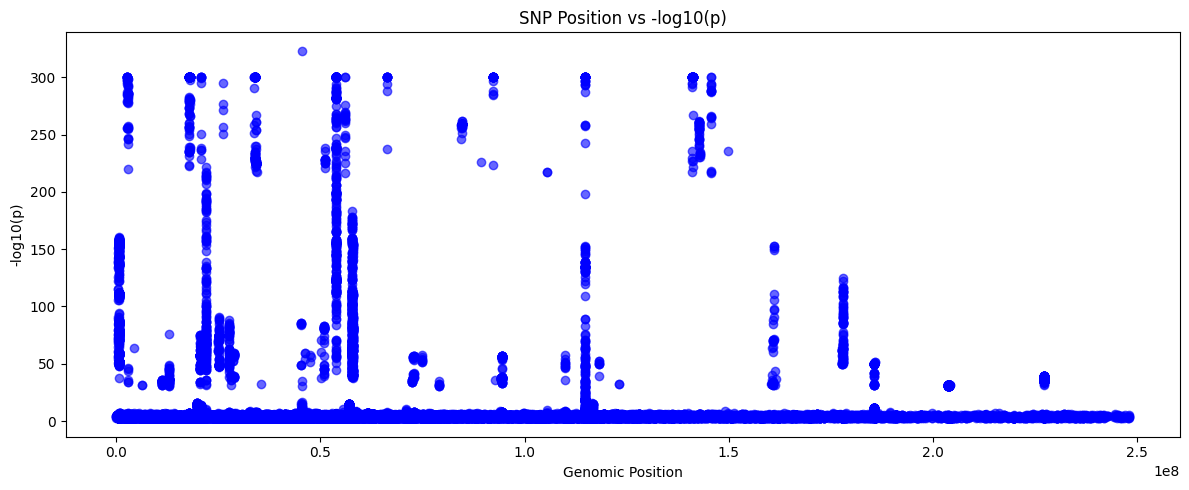

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(sp["position"], sp["logP"], alpha=0.6, c=sp["chromosome_code"] if 'chromosome_code' in sp.columns else 'blue')
plt.title("SNP Position vs -log10(p)")
plt.xlabel("Genomic Position")
plt.ylabel("-log10(p)")
plt.tight_layout()
plt.show()

correlation heatmap of the features

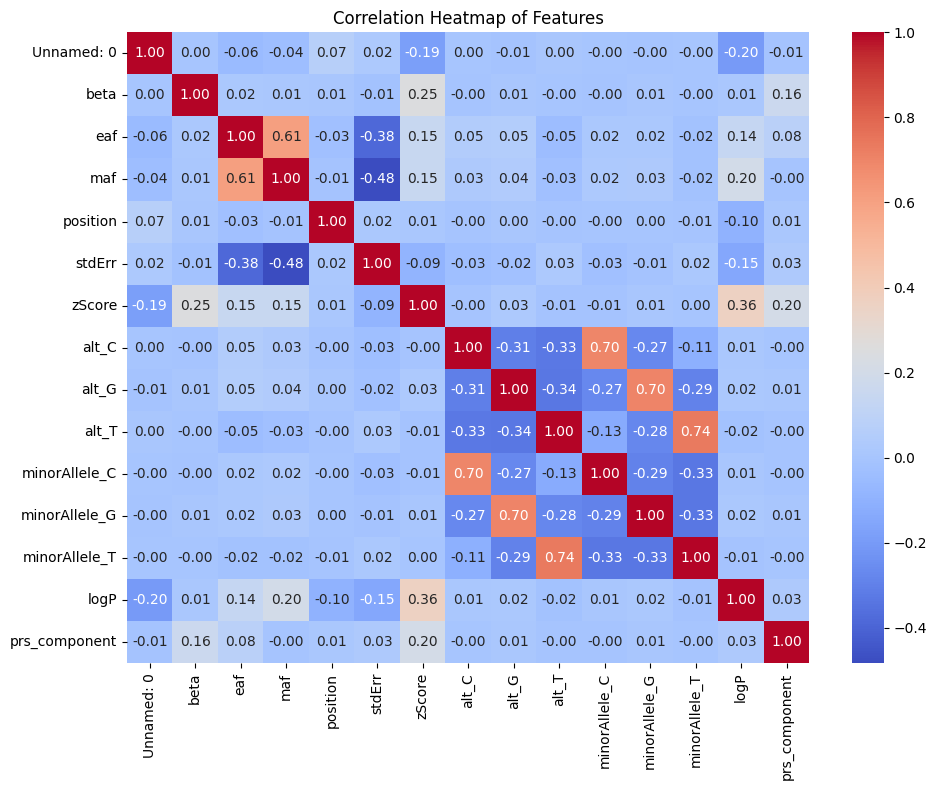

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(sp.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


Z score distribution across PRS Quartiles

<ipython-input-8-6c87a05864b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prs_bin', y='zScore', data=sp, palette='Set2')


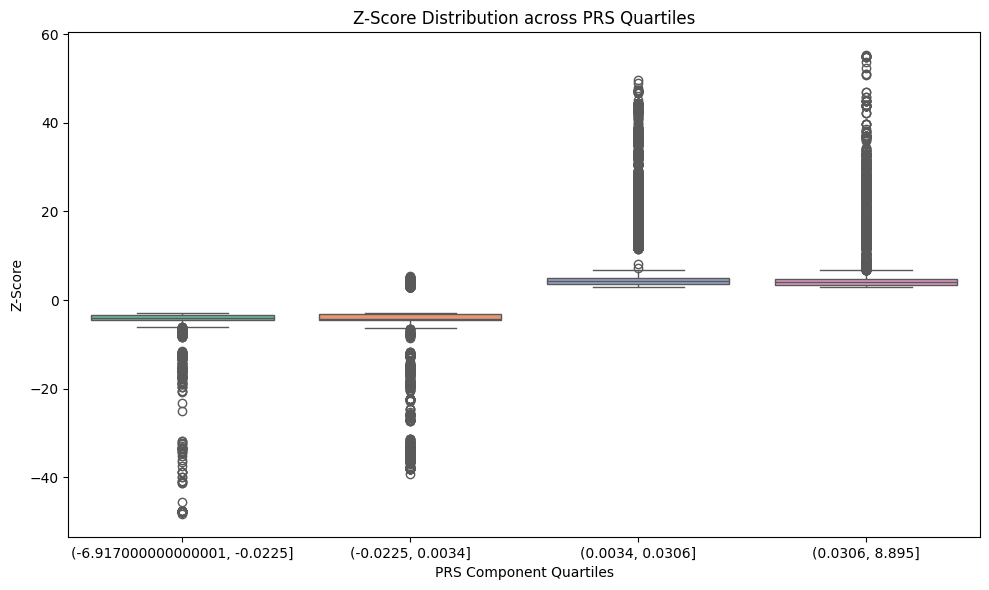

In [ ]:
sp['prs_bin'] = pd.qcut(sp['prs_component'], q=4)

plt.figure(figsize=(10, 6))
sns.boxplot(x='prs_bin', y='zScore', data=sp, palette='Set2')
plt.title("Z-Score Distribution across PRS Quartiles")
plt.xlabel("PRS Component Quartiles")
plt.ylabel("Z-Score")
plt.tight_layout()
plt.show()


estimating significant snps

<ipython-input-9-4f17e4d5bbc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="position", y="logP", data=top_snps, palette="rocket")


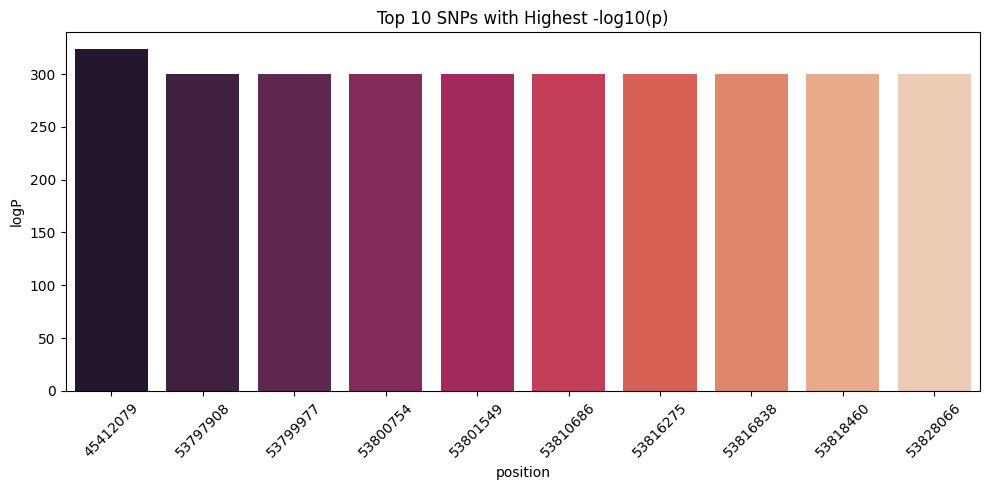

In [ ]:
top_snps = sp.nlargest(10, 'logP')[["position", "logP", "prs_component"]]

plt.figure(figsize=(10, 5))
sns.barplot(x="position", y="logP", data=top_snps, palette="rocket")
plt.title("Top 10 SNPs with Highest -log10(p)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


distribution of PRS agaist minor allele frequency

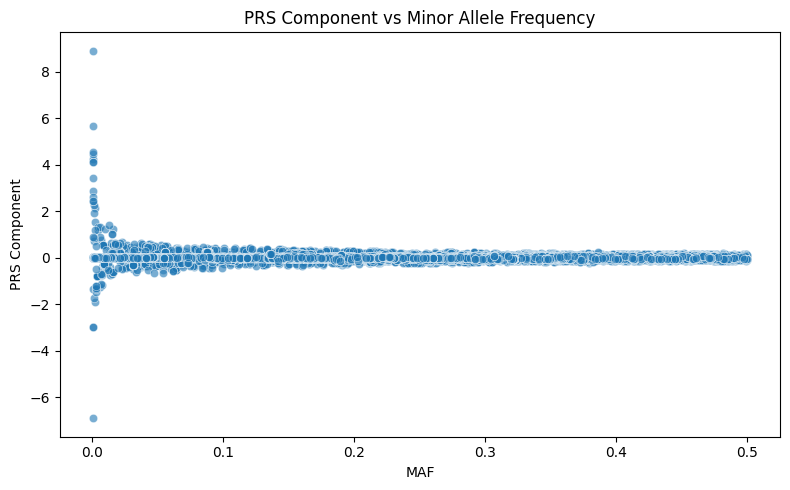

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="maf", y="prs_component", data=sp, alpha=0.6)
plt.title("PRS Component vs Minor Allele Frequency")
plt.xlabel("MAF")
plt.ylabel("PRS Component")
plt.tight_layout()
plt.show()


target

In [ ]:
tp = pd.read_csv('target_processed.csv')


In [ ]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9463 non-null   int64  
 1   beta           9463 non-null   float64
 2   eaf            9463 non-null   float64
 3   maf            9463 non-null   float64
 4   position       9463 non-null   int64  
 5   stdErr         9463 non-null   float64
 6   zScore         9463 non-null   float64
 7   alt_C          9463 non-null   bool   
 8   alt_G          9463 non-null   bool   
 9   alt_T          9463 non-null   bool   
 10  minorAllele_C  9463 non-null   bool   
 11  minorAllele_G  9463 non-null   bool   
 12  minorAllele_T  9463 non-null   bool   
 13  logP           9463 non-null   float64
 14  prs_component  9463 non-null   float64
dtypes: bool(6), float64(7), int64(2)
memory usage: 720.9 KB
